# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [13]:
tt = pd.read_csv('titanic.csv')
tt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# we can see its showing no null values, but lets check if any-:

In [8]:
tt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

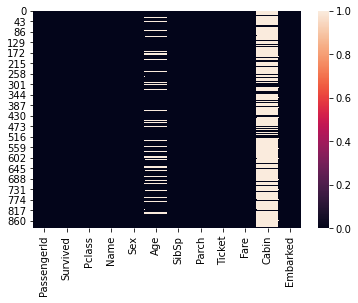

In [9]:
sns.heatmap(tt.isnull())

In [10]:
# removing the column in a new df of dataset which we dont need
# tt_new -------> ttn

In [14]:
ttn = tt.copy()
ttn.drop(['Name','Ticket','Cabin'], axis = 1, inplace = True)

In [17]:
ttn.drop(['PassengerId'], axis = 1, inplace = True)

In [18]:
ttn.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values= np.nan, strategy='median')
age = si.fit_transform(ttn['Age'].to_numpy().reshape(-1,1))
age.shape

(891, 1)

In [39]:
ttn['Age'] = age
ttn.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [51]:
ttn.dropna(inplace=True)

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sex = le.fit_transform(ttn['Sex'].to_numpy().reshape(-1,1))
sex.shape

(889,)

In [53]:
embarked = le.fit_transform(ttn['Embarked'].to_numpy().reshape(-1,1))

In [64]:
ttn['Sex'] = sex
ttn['Embarked'] = embarked
print(ttn.head())
print('---------'*20)
print(ttn.isnull().sum())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [58]:
# now our data has been cleaned (no null values, no unecessary columns)

In [59]:
# EDA

In [73]:
bypclass = ttn.groupby(['Pclass','Sex']).describe()
bypclass

Survived                                                 Age  \
              count      mean       std  min  25%  50%  75%  max  count   
Pclass Sex                                                                
1      0       92.0  0.967391  0.178583  0.0  1.0  1.0  1.0  1.0   92.0   
       1      122.0  0.368852  0.484484  0.0  0.0  0.0  1.0  1.0  122.0   
2      0       76.0  0.921053  0.271448  0.0  1.0  1.0  1.0  1.0   76.0   
       1      108.0  0.157407  0.365882  0.0  0.0  0.0  0.0  1.0  108.0   
3      0      144.0  0.500000  0.501745  0.0  0.0  0.5  1.0  1.0  144.0   
       1      347.0  0.135447  0.342694  0.0  0.0  0.0  0.0  1.0  347.0   

                       ...        Fare           Embarked                      \
                 mean  ...         75%       max    count      mean       std   
Pclass Sex             ...                                                      
1      0    33.630435  ...  134.783325  512.3292     92.0  1.054348  0.998506   
       1    38.995246  ...   78.459375  512.3292    122.0  1.303279  0.952503   
2      0    28.703947  ...   26.062500   65.0000     76.0  1.789474  0.595892   
       1    30.512315  ...   26.000000   73.5000    108.0  1.805556  0.587380   
3      0    23.572917  ...   20.221875   69.5500    144.0  1.451389  0.755677   
       1    26.911873  ...   10.008300   69.5500    347.0  1.639769  0.692593   

                                     
            min  25%  50%  75%  max  
Pclass Sex                           
1      0    0.0  0.0  2.0  2.0  2.0  
       1    0.0  0.0  2.0  2.0  2.0  
2      0    0.0  2.0  2.0  2.0  2.0  
       1    0.0  2.0  2.0  2.0  2.0  
3      0    0.0  1.0  2.0  2.0  2.0  
       1    0.0  2.0  2.0  2.0  2.0  

[6 rows x 48 columns]

<AxesSubplot:>

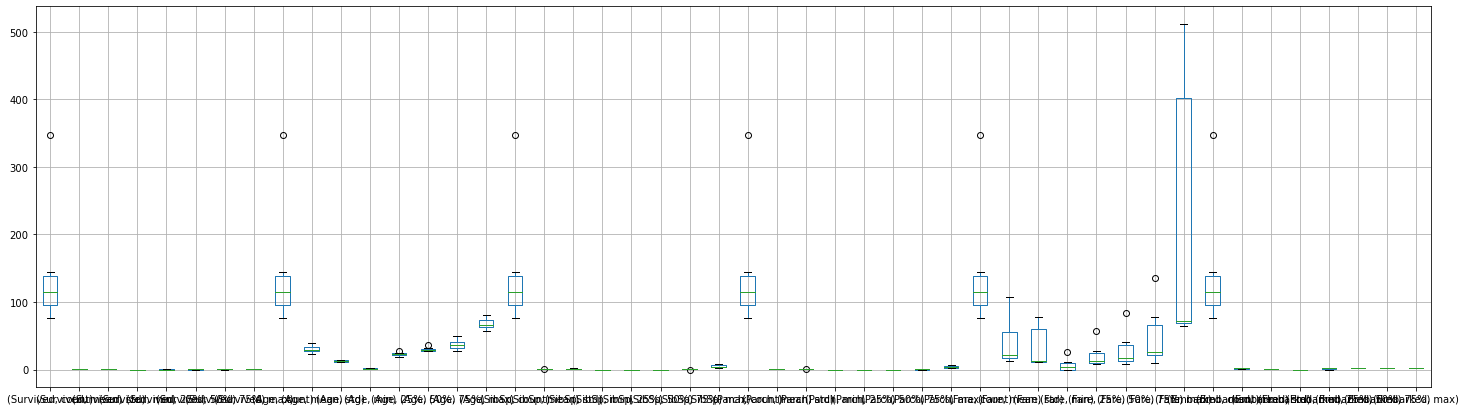

In [82]:
plt.figure(figsize=(25,7))
bypclass.boxplot()

<AxesSubplot:>

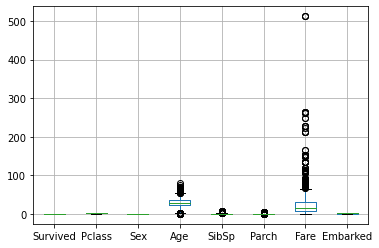

In [83]:
ttn.boxplot()

In [84]:
# the boxplot shows some outliers in fare column, yet the passengers may pay higher fares for more facility
# the boxplot shows some outliers in age column yet the avg age is 29 present onboard but there are some senior persons whose age counts max to 80.

<AxesSubplot:xlabel='Survived', ylabel='count'>

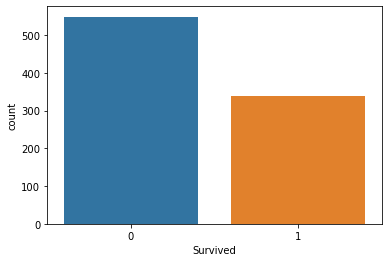

In [85]:
sns.countplot(ttn['Survived'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

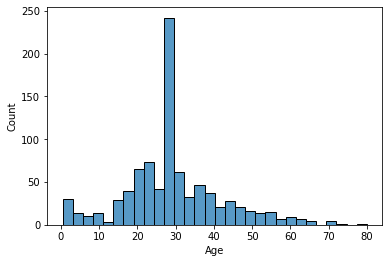

In [90]:
sns.histplot(ttn['Age'])

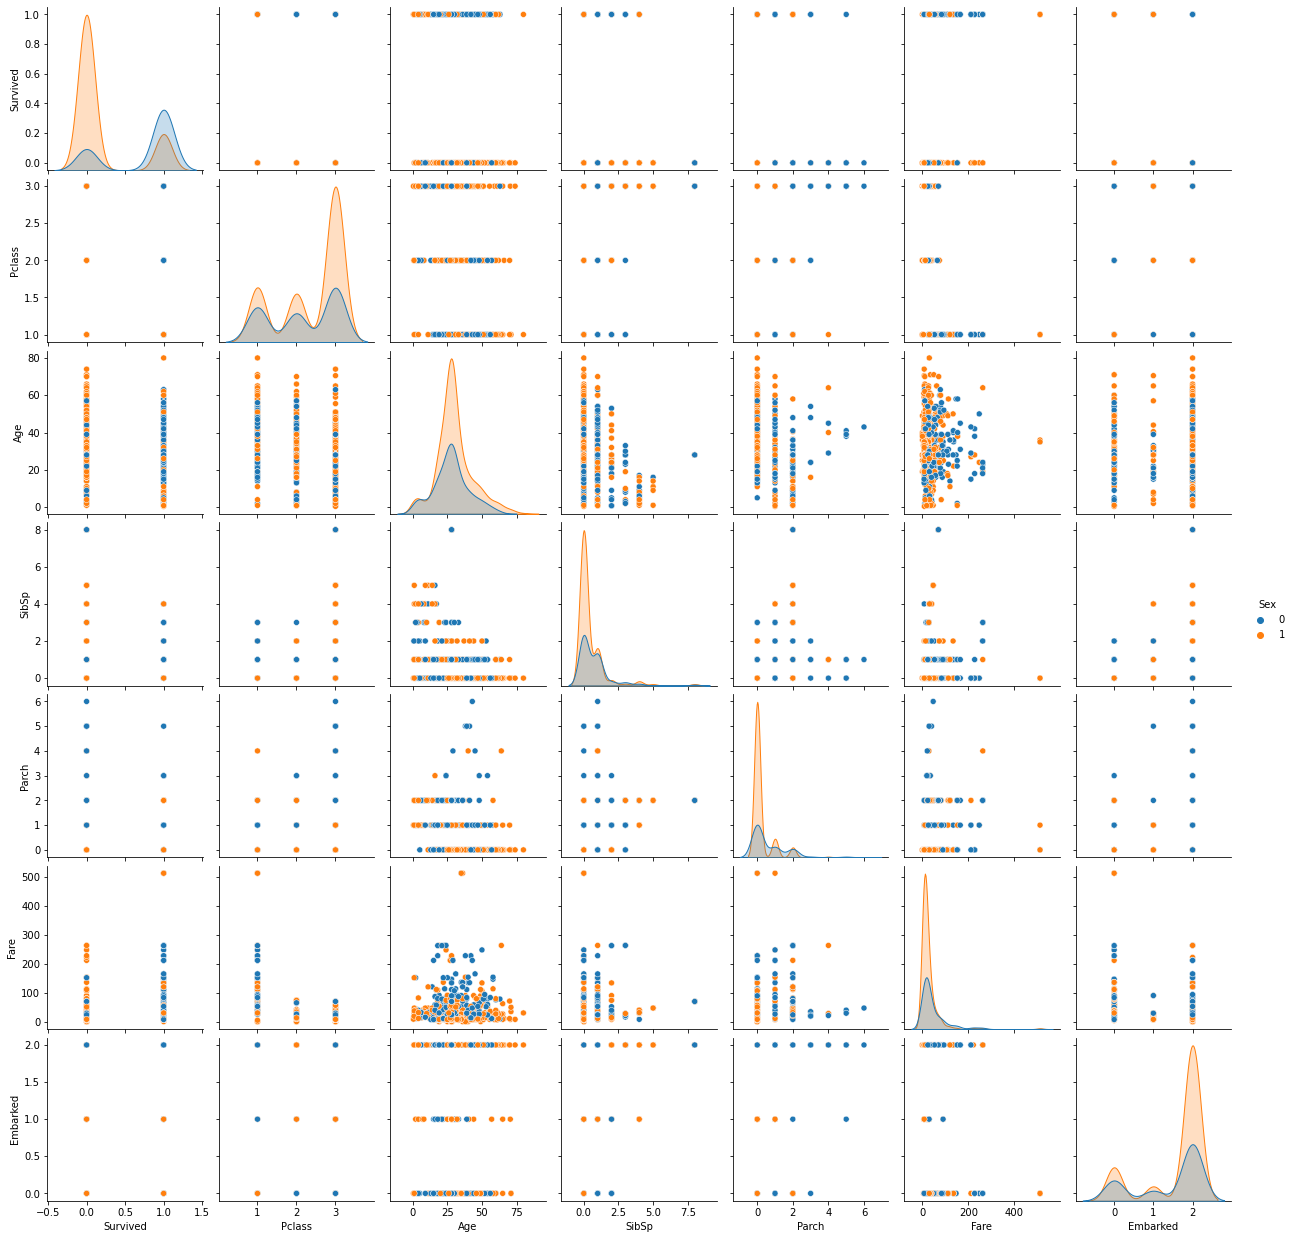

In [124]:
sns.pairplot(ttn, hue = 'Sex')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

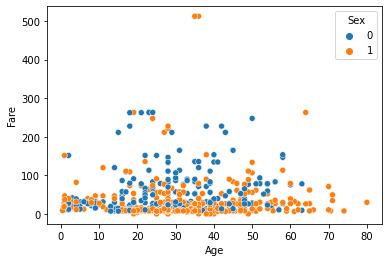

In [106]:
sns.scatterplot(x='Age',y='Fare', hue = 'Sex', data = ttn )

<AxesSubplot:xlabel='Survived', ylabel='Age'>

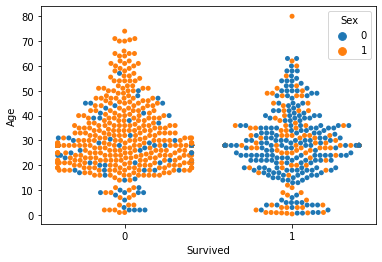

In [107]:
sns.swarmplot(x='Survived',y='Age', hue = 'Sex', data = ttn )

# we can see that females (0) survival rate in the age group (20-40) is more compare to males
# the male deceased more in all age groups

<AxesSubplot:xlabel='Survived', ylabel='Age'>

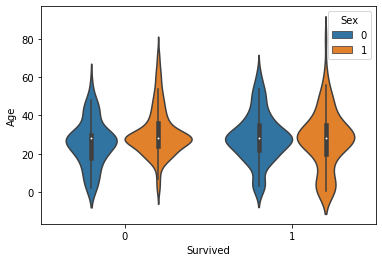

In [109]:
sns.violinplot(x='Survived',y='Age', hue = 'Sex', data = ttn )

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

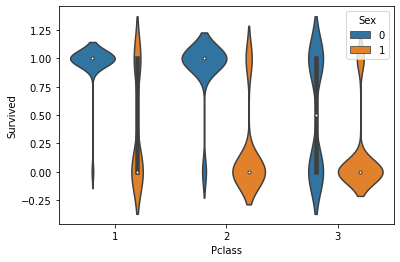

In [115]:
sns.violinplot(y='Survived',x='Pclass', hue = 'Sex', data = ttn )

# survival rate is likely to higher of female in 1st class and 2nd class
# for female survival rate is almost equal(both 0 and 1) in 3rd class 
# males in 3rd class was having almost zero survival rate

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

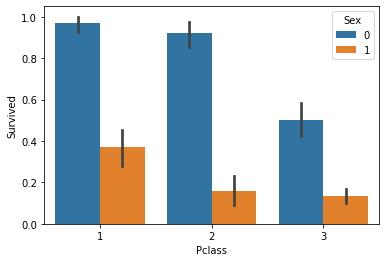

In [116]:
sns.barplot(y='Survived',x='Pclass', hue = 'Sex', data = ttn )

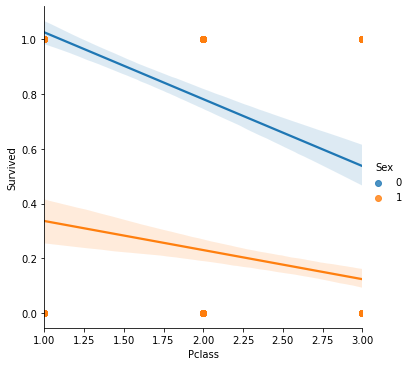

In [117]:
sns.lmplot(y='Survived',x='Pclass', hue = 'Sex', data = ttn )

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

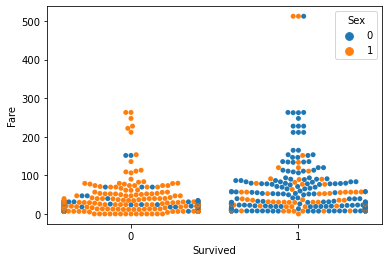

In [121]:
sns.swarmplot(y='Fare',x='Survived', hue = 'Sex', data = ttn )

# the female who survived was likely paid more fare 
# more no. of males who paid more fare there survival rate is also zero

<AxesSubplot:>

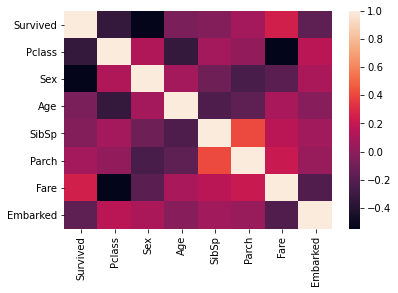

In [122]:
sns.heatmap(ttn.corr())

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

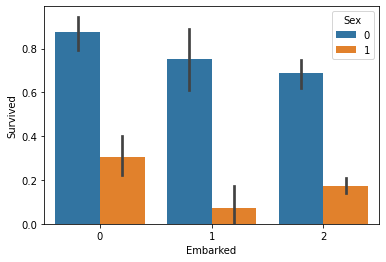

In [125]:
sns.barplot(x = 'Embarked',y='Survived', hue = 'Sex', data = ttn )

there were three embarking points c= 0, q= 1, s= 2



females have more survival rate embarked from any point(0,1,2), males embarked from 0 have more survival rate other than any point.

In [130]:
ttn.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2


In [133]:
x = ttn.drop('Survived', axis = 1)
x.shape

(889, 7)

In [134]:
y = ttn['Survived']
y.shape

(889,)

In [136]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .3, random_state = 9)
l = [x_train, x_test, y_train, y_test]
for i in l:
    print(i.shape)

(622, 7)
(267, 7)
(622,)
(267,)


In [143]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train,y_train))

0.8022508038585209


In [146]:
predlr = lr.predict(x_test)

In [147]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(predlr,y_test))
print(classification_report(predlr, y_test))

[[139  31]
 [ 22  75]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       170
           1       0.71      0.77      0.74        97

    accuracy                           0.80       267
   macro avg       0.79      0.80      0.79       267
weighted avg       0.81      0.80      0.80       267



In [155]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


gnb = GaussianNB()
dtc = DecisionTreeClassifier()
svc = SVC()
knc = KNeighborsClassifier()

models = [gnb, dtc, svc, knc]

for m in models:
    m.fit(x_train, y_train)
    print(m.score(x_train,y_train))
    print('\n')
    pred = m.predict(x_test)
    print(confusion_matrix(pred, y_test))
    print(classification_report(pred, y_test))
    print('-------'*20)

0.7845659163987139


[[134  28]
 [ 27  78]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       162
           1       0.74      0.74      0.74       105

    accuracy                           0.79       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.79      0.79      0.79       267

--------------------------------------------------------------------------------------------------------------------------------------------
0.9839228295819936


[[128  30]
 [ 33  76]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       158
           1       0.72      0.70      0.71       109

    accuracy                           0.76       267
   macro avg       0.76      0.75      0.75       267
weighted avg       0.76      0.76      0.76       267

---------------------------------------------------------------------------------------------------------------------

In [157]:
# we will check out for 3 models
# logistic reg
# Gaussian nb
# Decision tree

In [164]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(lr,x,y,cv=5)
print(cv)
print('mean of cv is:', round(cv.mean(),2))

[0.78651685 0.78651685 0.78089888 0.76404494 0.81920904]
mean of cv is: 0.79


In [165]:
predgnb = gnb.predict(x_test)
cv = cross_val_score(gnb,x,y,cv=5)
print(cv)
print('mean of cv for gnb is:', round(cv.mean(),2))

[0.76966292 0.79213483 0.78651685 0.80337079 0.80225989]
mean of cv for gnb is: 0.79


In [166]:
preddtc = dtc.predict(x_test)
cv = cross_val_score(dtc, x, y, cv= 5)
print(cv)
print('mean of cv for dtc is:', round(cv.mean(),2))

[0.75842697 0.78651685 0.80337079 0.73595506 0.81920904]
mean of cv for dtc is: 0.78


In [171]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier(random_state=1)
ad.fit(x_train, y_train)
predad= ad.predict(x_test)
print(confusion_matrix(y_test,predad))
print(classification_report(y_test, predad))

[[136  25]
 [ 23  83]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       161
           1       0.77      0.78      0.78       106

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267



In [172]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(x_train, y_train)
predgbc = gbc.predict(x_test)
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test, predgbc))

[[146  15]
 [ 27  79]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       161
           1       0.84      0.75      0.79       106

    accuracy                           0.84       267
   macro avg       0.84      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



In [173]:
import xgboost as xgb
xgb = xgb.XGBClassifier(random_state=1)
xgb.fit(x_train, y_train)
predxgb = xgb.predict(x_test)
print(confusion_matrix(y_test,predxgb))
print(classification_report(y_test, predxgb))

[[148  13]
 [ 30  76]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       161
           1       0.85      0.72      0.78       106

    accuracy                           0.84       267
   macro avg       0.84      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267



In [174]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

[[137  24]
 [ 32  74]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       161
           1       0.76      0.70      0.73       106

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267



In [178]:
model = [xgb,gbc,ad]
for m in model:
    cv = cross_val_score(m,x,y,cv=5)
    print(m)
    print(cv)
    print(f'cross-validation mean value for {m}:',round (cv.mean(),2))
    print('cross-validation std is:', cv.std())
    print('-----------'*20)

XGBClassifier(random_state=1)
[0.80898876 0.80898876 0.81460674 0.79213483 0.85875706]
cross-validation mean value for XGBClassifier(random_state=1): 0.82
cross-validation std is: 0.022340778495416422
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
GradientBoostingClassifier(random_state=1)
[0.80337079 0.8258427  0.84269663 0.80337079 0.84745763]
cross-validation mean value for GradientBoostingClassifier(random_state=1): 0.82
cross-validation std is: 0.01872350788603701
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
AdaBoostClassifier(random_state=1)
[0.74157303 0.81460674 0.80898876 0.79213483 0.84745763]
cross-validation mean value for AdaBoos

# ---------------------------------GRID SEARCH CV------------------------------------------

In [179]:
from sklearn.model_selection import GridSearchCV

param = {'n_estimators': [100,300,500,700,1000], 'criterion': ['friedman_mse', 'mse', 'mae'], 'max_depth':[3,5,7,8,9,10]}

gdcv = GridSearchCV(estimator=gbc, param_grid=param, scoring='accuracy', cv=5)
gdcv.fit(x_train, y_train)

best_parameters = gdcv.best_params_
print(best_parameters)
best_result = gdcv.best_score_
print(best_result)

{'criterion': 'mse', 'max_depth': 5, 'n_estimators': 100}
0.8038838709677419


In [180]:
gbc_new = GradientBoostingClassifier(n_estimators=100, criterion= 'mse', max_depth= 5)
gbc_new.fit(x_train, y_train)
predgbc_new = gbc_new.predict(x_test)
print(confusion_matrix(predgbc_new, y_test))
print(classification_report(predgbc_new, y_test))

[[137  30]
 [ 24  76]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       167
           1       0.72      0.76      0.74       100

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [181]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [183]:
y_pred_prob = gbc_new.predict_proba(x_test)[:,1]

In [184]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

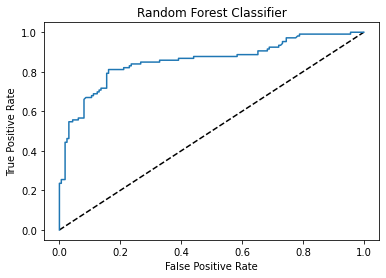

In [185]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [186]:
auc_score = roc_auc_score(y_test,gbc_new.predict(x_test))
print(auc_score)

0.7839564045470525


In [187]:
import joblib
joblib.dump(gbc_new, 'gbc_newfile.obj')

['gbc_newfile.obj']